In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm

norm = mpl.colors.Normalize(vmin=0, vmax=8)
cmap = cm.rainbow

m = cm.ScalarMappable(norm=norm, cmap=cmap)

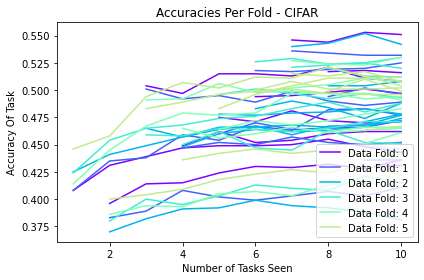

In [6]:
n_shifts = 6


for shift in range(n_shifts):
    df_of_split = pickle.load(open('shift_{}.p'.format(shift), 'rb'), encoding = 'latin1')[0]
    for task_num in range(10):
        df_of_split_of_task = df_of_split[df_of_split['tasks'] == task_num]
        if task_num < 9:
            if task_num == 1:
                plt.plot(range(task_num + 1, 11), 
                         np.array(df_of_split_of_task['accuracy']),
                         c = m.to_rgba(shift),
                         label = "Data Fold: {}".format(shift)
                        )
            else:
                plt.plot(range(task_num + 1, 11), 
                         np.array(df_of_split_of_task['accuracy']),
                         c = m.to_rgba(shift)
                        )
    plt.title("Accuracies Per Fold - CIFAR")
    plt.ylabel("Accuracy Of Task")
    plt.xlabel("Number of Tasks Seen")
    plt.tight_layout()
    plt.legend(loc = "lower right")

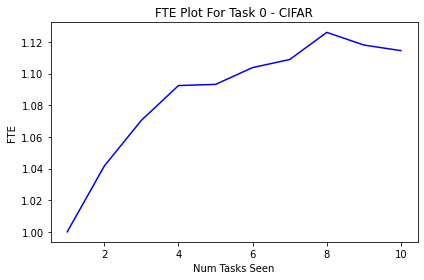

In [15]:
FTE_across_shifts = []
for shift in range(n_shifts):
    pkl_tuple = pickle.load(open('shift_{}.p'.format(shift), 'rb'), encoding = 'latin1')
    df_of_split = pkl_tuple[0]
    single_task_error = 1 - float(pkl_tuple[1][pkl_tuple[1]['task'] == 1]['accuracy'])
    forward_accuracies = df_of_split[(df_of_split['tasks'] == 0)]['accuracy']
    FTE_across_shifts.append(single_task_error / (1 - forward_accuracies))

plt.title("FTE Plot For Task 0 - CIFAR")
plt.ylabel("FTE")
plt.xlabel("Num Tasks Seen")
plt.plot(range(1, 11), np.mean(FTE_across_shifts, axis = 0), c = 'b')
plt.tight_layout()
plt.show()



[0.98013245 1.01023891 1.01196581 1.02777778 1.03859649 1.03677758
 1.04225352 1.03496503 1.04964539]
[0.95948136 0.96890344 1.         0.98996656 0.98502496 0.99162479
 0.99831366 0.99162479 1.00509338]
[0.91269841 0.93042071 0.94417077 0.94572368 0.95673877 0.94884488
 0.94572368 0.93954248 0.92891761]
[0.92903226 0.96       0.95206612 0.96482412 0.98126065 0.97627119
 0.97297297 0.99481865 0.98461538]
[0.95439739 0.9669967  0.96540362 0.98487395 0.98819562 0.98157454
 0.99829642 1.0017094  0.99490662]
[0.92333333 0.9295302  0.93739425 0.95189003 0.96013865 0.96684119
 0.96180556 0.97535211 0.95847751]
[0.9431792  0.96101499 0.9685001  0.97750935 0.98499252 0.9836557
 0.98656097 0.98966875 0.98694265]
9


ValueError: x and y must have same first dimension, but have shapes (2,) and (9,)

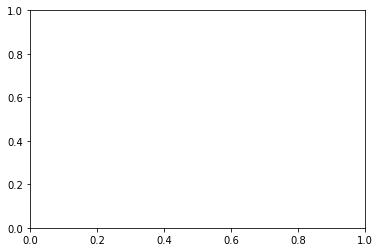

In [38]:
n_shifts = 6

btes_across_tasks_across_shifts = [[] for _ in range(n_shifts)]

for task in range(1,11):
    btes_across_shifts = []
    for shift in range(n_shifts):
        pkl_tuple = pickle.load(open('shift_{}.p'.format(shift), 'rb'), encoding = 'latin1')
        df_of_split = pkl_tuple[0]
        single_task_error = 1 - float(pkl_tuple[1][pkl_tuple[1]['task'] == task]['accuracy'])
        df_of_split_of_task = df_of_split[df_of_split['tasks'] == task]
        btes_across_shifts.append(single_task_error / (np.array((1 - df_of_split_of_task['accuracy']))))
        print((np.array((1 - df_of_split_of_task['accuracy'])))
    print(np.mean(btes_across_shifts, axis = 0))
    print(task_num)
    plt.plot(range(task_num, 11), np.mean(btes_across_shifts, axis = 0), c = 'b')
        
    
plt.title("BTEs For Task 0 - CIFAR")
plt.ylabel("BTE")
plt.xlabel("Number of Tasks Seen")
plt.tight_layout()
plt.show()